# Steps to follow in building a model

### 1) Reading, understanding and visualising the data.
### 2) Data Preparation (splitting data into training data and test data set, scaling etc).
### 3) Training the model.
### 4) Residual Analysis.
### 5) Predictions and evaluations on the test set.




# Data understanding, preparation and EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
carsprice_df = pd.read_csv("CarPrice_Assignment.csv")
carsprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
## dropping unwanted column car_ID

carsprice_df.drop(columns=['car_ID'], inplace=True)


In [4]:
carsprice_df.shape

(205, 25)

In [5]:
carsprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [6]:
#######  Checking for null values

carsprice_df.isnull().sum()

######### No null values in any column

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### No null values in any column

### There are 15 numerical columns and 10 categorical columns


In [7]:
carsprice_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Cleaning up CarName column

In [8]:
# Splitting and extracting Car company name from CarName column

carsprice_df['CarName'] = carsprice_df['CarName'].str.lower().str.split(" ").str[0]


In [9]:
carsprice_df['CarName'].value_counts()

##### Observered duplicate entries for some of the car company names

toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
vw              2
maxda           2
vokswagen       1
mercury         1
toyouta         1
porcshce        1
Name: CarName, dtype: int64

###  Removing duplicates in CarName column

In [10]:
########  Removing duplicates in CarName column   #############

######## replacing all variants with toyota         
carsprice_df.CarName = carsprice_df.CarName.replace('toyouta', 'toyota') 

######## replacing all variants with mazda   
carsprice_df.CarName = carsprice_df.CarName.replace('maxda', 'mazda') 

######## replacing all variants with porsche      
carsprice_df.CarName = carsprice_df.CarName.replace('porcshce', 'porsche')

######## replacing all variants with volkswagen
carsprice_df.CarName = carsprice_df.CarName.replace(['vokswagen', 'vw'], 'volkswagen')


In [11]:

len(carsprice_df['CarName'].value_counts())

#### after removing duplicates in CarName column, there are 22 unique car company names

22

In [12]:

## Printing the counts of distinct Car Companies sorted by alphabetical order of company names 

carsprice_df['CarName'].value_counts().sort_index()


alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: CarName, dtype: int64

# Visualizing numerical variables

In [13]:

# created a new data frame with only numerical variables from the carsprice data frame
carsprice_numerical = carsprice_df.select_dtypes(exclude=object)
print(carsprice_numerical.columns)


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


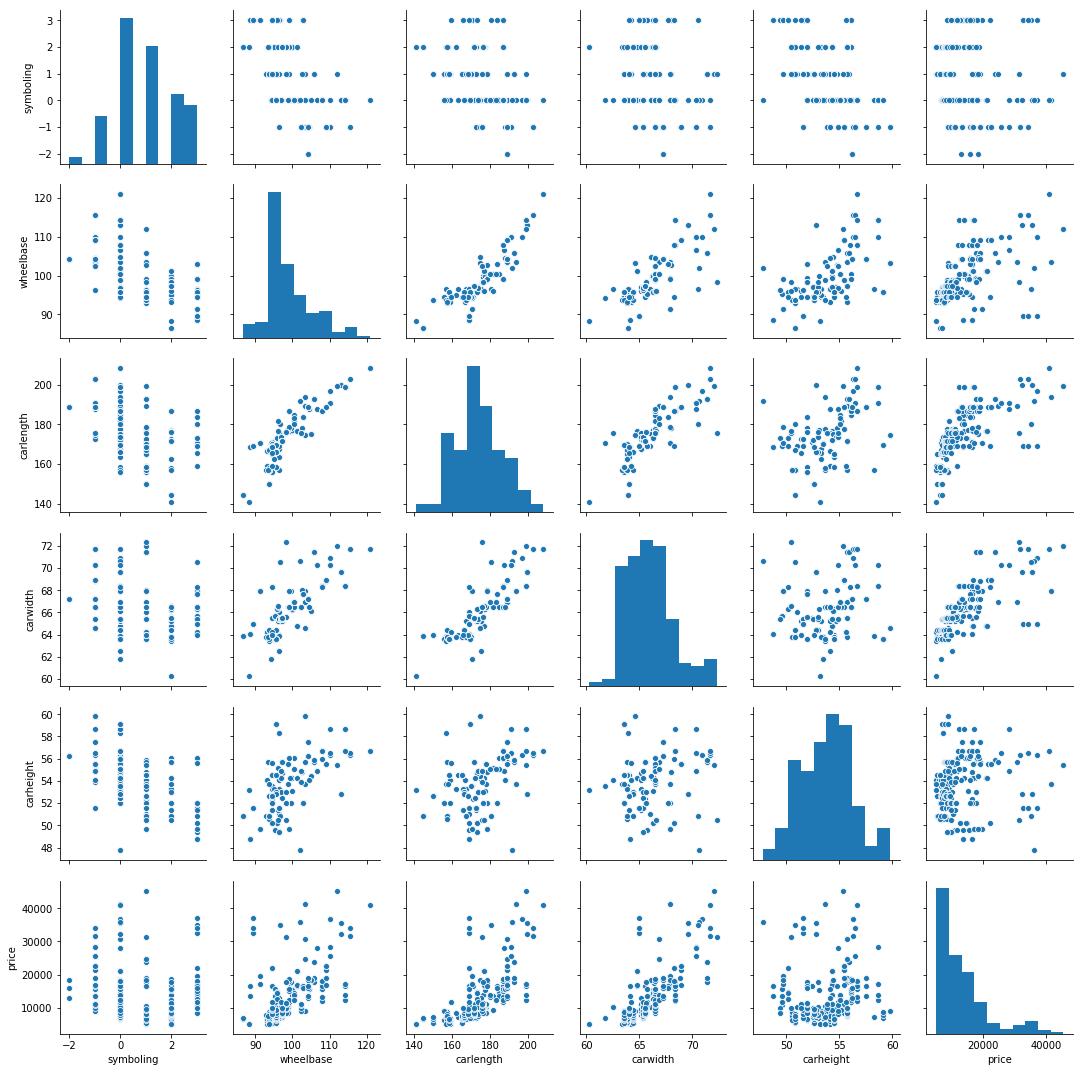

In [14]:
#### visualizing numerical variables

# creating temp_df with target variable price
temp_df = pd.concat([carsprice_numerical.iloc[:,:5], carsprice_numerical[['price']]], axis=1)

## plotting pair plot for first 5 numerical variables in carsprice dataframe
sns.pairplot(temp_df)


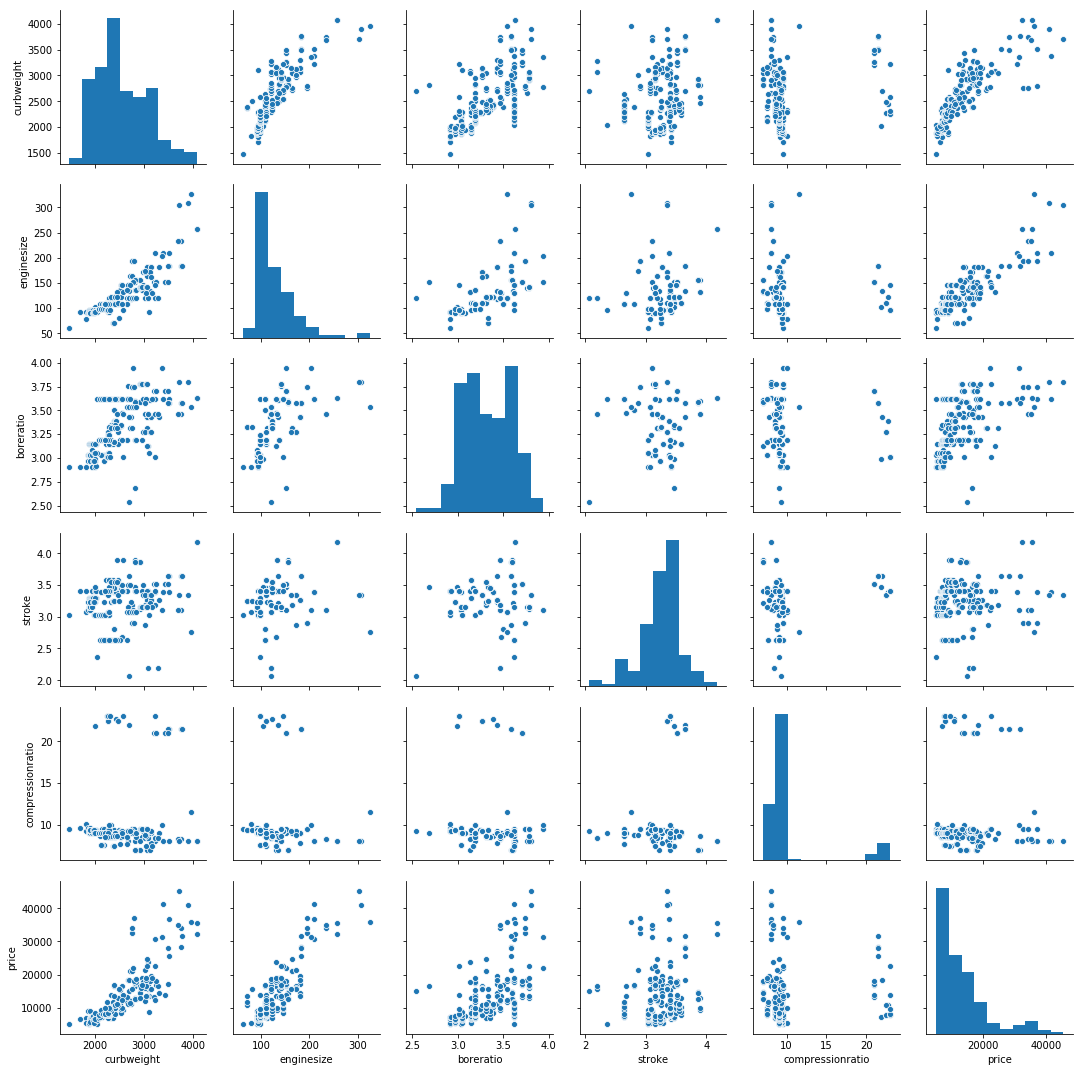

In [15]:

# creating temp_df with target variable price
temp_df = pd.concat([carsprice_numerical.iloc[:,5:10], carsprice_numerical[['price']]], axis=1)

## plotting pair plot for next 5 numerical variables in carsprice dataframe
sns.pairplot(temp_df)


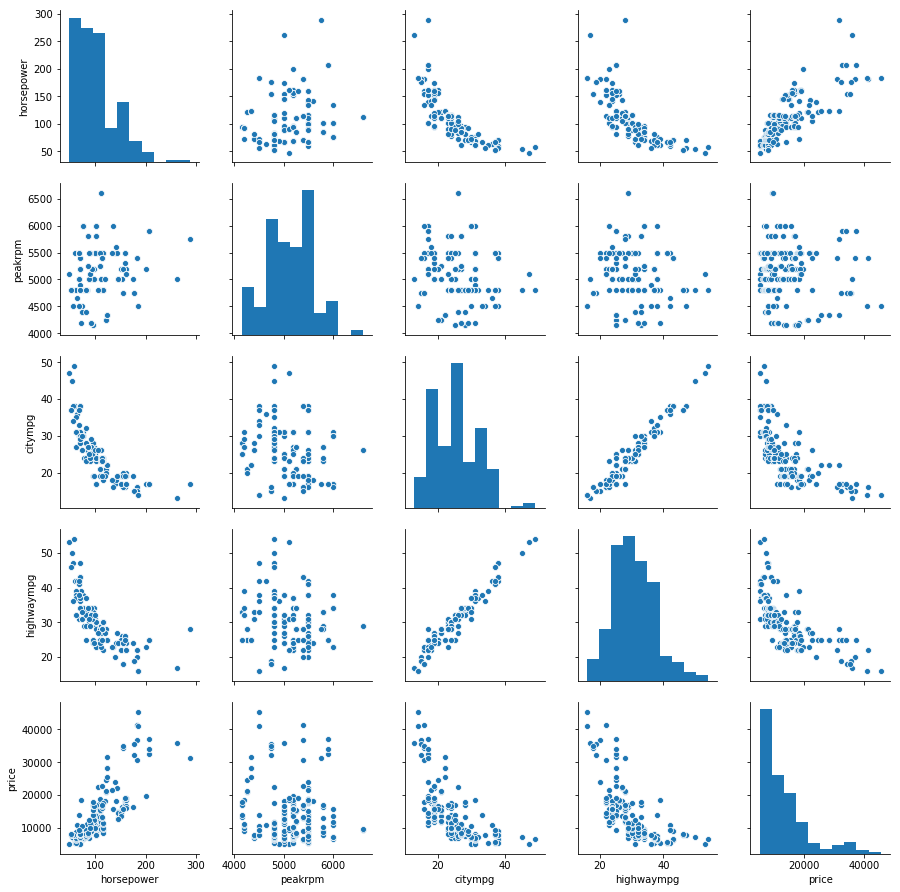

In [16]:
## plotting pair plot for next 5 numerical variables in carsprice dataframe

sns.pairplot(carsprice_numerical.iloc[:, 10:15])


##  We do visualization to check the following 
- Whether we should consider linear regression model on this data set ?
- To check multicolinearity

## Conclusions after visualizing numerical variables are

### yes we can consider  linear regression model as there are few independent variables which are correlated with dependent target variable 'price'.

### Observed multicollinearity between some variables 
- citympg is correlated highwaympg
- curbweight is correlated with enginesize and boreratio
- wheelbase is correlated with carlength, carwidth, carheight

### Observed the following variables are correlated with price
- to some extent price is correlated with wheelbase, carlength and carwidth
- price is correlated with horsepower
- price is correlated with enginesize and curbweight


# Visualizing categorical variables

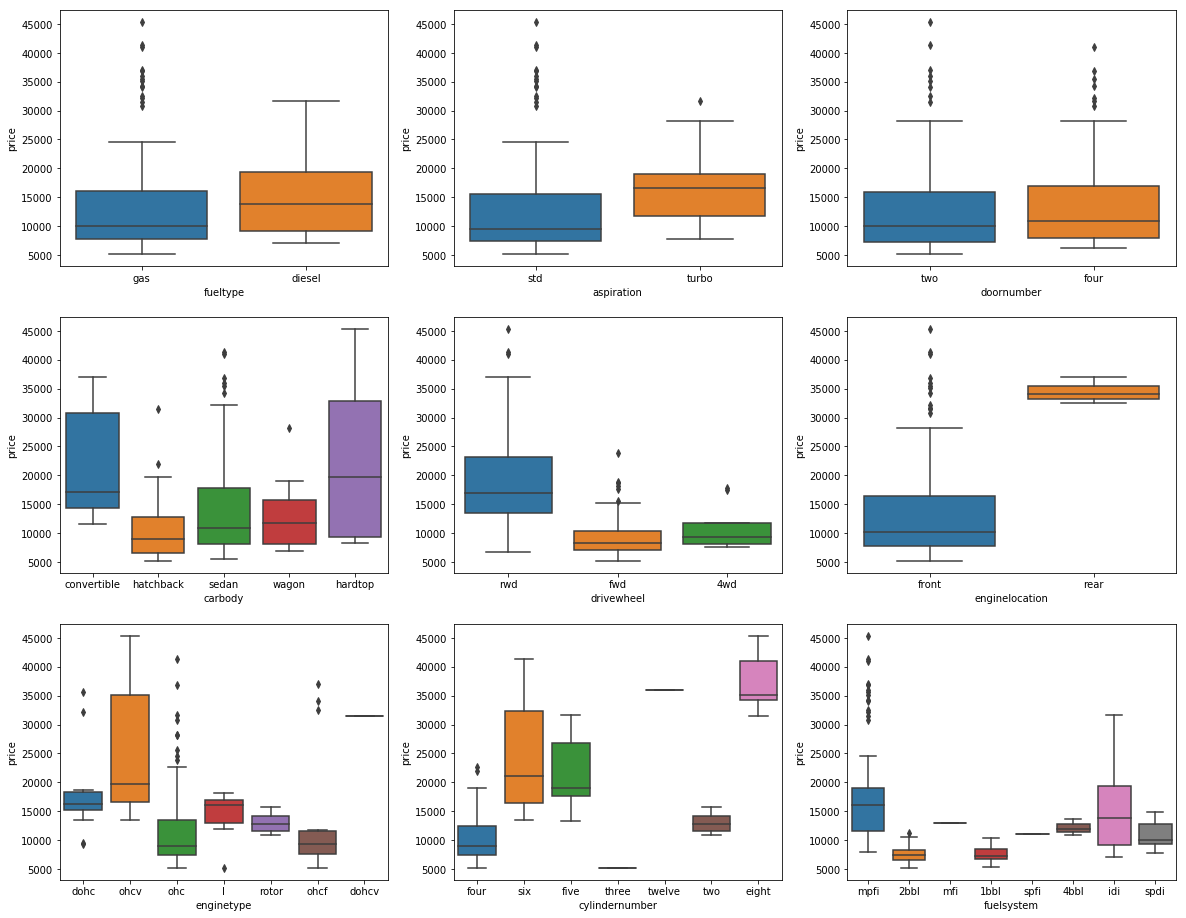

In [17]:
#### Visualizing the categorical variables

plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 1)
sns.boxplot(x='fueltype', y='price', data=carsprice_df)
plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y='price', data=carsprice_df)
plt.subplot(3, 3, 3)
sns.boxplot(x='doornumber', y='price', data=carsprice_df)
plt.subplot(3, 3, 4)
sns.boxplot(x='carbody', y='price', data=carsprice_df)
plt.subplot(3, 3, 5)
sns.boxplot(x='drivewheel', y='price', data=carsprice_df)
plt.subplot(3, 3, 6)
sns.boxplot(x='enginelocation', y='price', data=carsprice_df)
plt.subplot(3, 3, 7)
sns.boxplot(x='enginetype', y='price', data=carsprice_df)
plt.subplot(3, 3, 8)
sns.boxplot(x='cylindernumber', y='price', data=carsprice_df)
plt.subplot(3, 3, 9)
sns.boxplot(x='fuelsystem', y='price', data=carsprice_df)
plt.show()


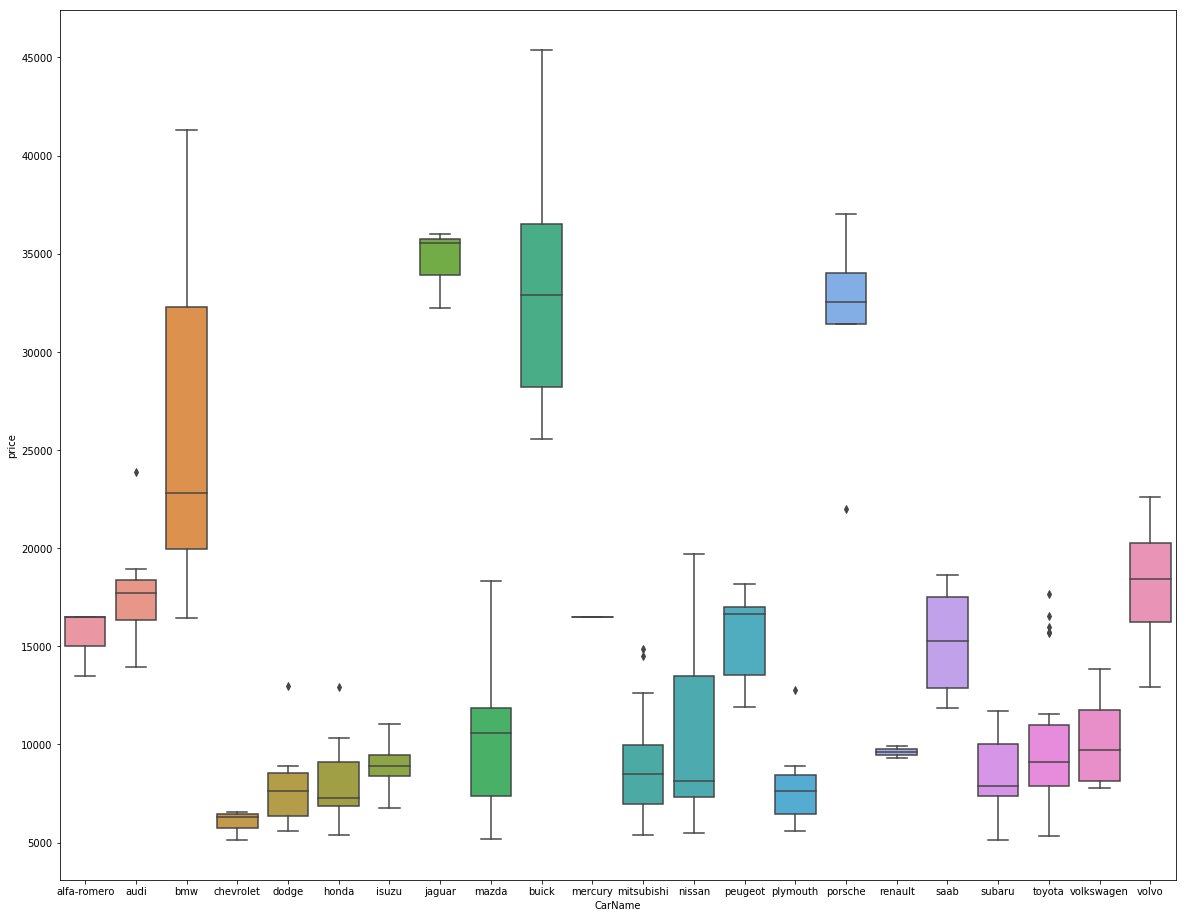

In [18]:
plt.figure(figsize=(20, 16))
sns.boxplot(x='CarName', y='price', data=carsprice_df)

## Conclusions after visualizing categorical variables are
- Rear Engine Location is correlated with Price
- There is little correlation between Diesel Fuel Type, Turbo Aspiration and Price
- DriveWheel_rwd is correlated with price
- EngineType dohcv is correlated with price
- CarNames bmw, jaguar, buick, porsche are correlated with price

# Data Preparation - Preparing the data for modelling
- Encoding:
    - Converting binary categorical variables to 0s and 1s
    - Converting other categorical variables to dummy variables-
- Splitting the dataset into train dataset and test dataset
- Rescaling of variables
    


### Identifying Binary Categorical Variables

In [19]:
## identifying binary categorical variables

carsprice_categorical = carsprice_df.select_dtypes(include=object)
carsprice_categorical.head()


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [20]:
## Binary categorical variables

print(carsprice_categorical.enginelocation.value_counts(), end="\n\n")
print(carsprice_categorical.fueltype.value_counts(), end="\n\n")
print(carsprice_categorical.aspiration.value_counts(), end="\n\n")
print(carsprice_categorical.doornumber.value_counts(), end="\n\n")


front    202
rear       3
Name: enginelocation, dtype: int64

gas       185
diesel     20
Name: fueltype, dtype: int64

std      168
turbo     37
Name: aspiration, dtype: int64

four    115
two      90
Name: doornumber, dtype: int64



### Converting Binary Categorical Variables to 0s and 1s

In [21]:
### Mapping Binary Categorical variables to 0s and 1s

carsprice_df.enginelocation = carsprice_df.enginelocation.map({'front':1,'rear':0})
carsprice_df.fueltype = carsprice_df.fueltype.map({'gas':1,'diesel':0})
carsprice_df.aspiration = carsprice_df.aspiration.map({'std':1,'turbo':0})
carsprice_df.doornumber = carsprice_df.doornumber.map({'four':1,'two':0})


## Creating dummy variables for the remaining categorical variables

In [22]:
carsprice_categorical = carsprice_df.select_dtypes(include=object)
carsprice_categorical.head(10)

,CarName,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,alfa-romero,convertible,rwd,dohc,four,mpfi
1,alfa-romero,convertible,rwd,dohc,four,mpfi
2,alfa-romero,hatchback,rwd,ohcv,six,mpfi
3,audi,sedan,fwd,ohc,four,mpfi
4,audi,sedan,4wd,ohc,five,mpfi
5,audi,sedan,fwd,ohc,five,mpfi
6,audi,sedan,fwd,ohc,five,mpfi
7,audi,wagon,fwd,ohc,five,mpfi
8,audi,sedan,fwd,ohc,five,mpfi
9,audi,hatchback,4wd,ohc,five,mpfi


In [23]:
## checking number of levels in each categorical variable

print("Levels in CarName = ", len(carsprice_df.CarName.value_counts()), end="\n\n")
print("Levels in carbody = ", len(carsprice_df.carbody.value_counts()), end="\n\n")
print("Levels in drivewheel = ", len(carsprice_df.drivewheel.value_counts()), end="\n\n")
print("Levels in enginetype = ", len(carsprice_df.enginetype.value_counts()), end="\n\n")
print("Levels in cylindernumber = ", len(carsprice_df.cylindernumber.value_counts()), end="\n\n")
print("Levels in fuelsystem = ", len(carsprice_df.fuelsystem.value_counts()), end="\n\n")

Levels in CarName =  22

Levels in carbody =  5

Levels in drivewheel =  3

Levels in enginetype =  7

Levels in cylindernumber =  7

Levels in fuelsystem =  8



### Creating dummy variables for the categorical variables with more than 2 levels

In [24]:

# converting the following columns to dummy variables 
# columns=['CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']

carsprice_categorical_df = pd.get_dummies(data=carsprice_categorical, drop_first=True)
carsprice_categorical_df.head()


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Concatenating dummy variables df with the main dataframe

In [25]:
carsprice_df = pd.concat([carsprice_df, carsprice_categorical_df], axis=1)
carsprice_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,1,1,0,convertible,rwd,1,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,1,1,0,hatchback,rwd,1,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


## Removing redundant categorical variables from dataframe

In [26]:

carsprice_df.drop(columns=['CarName', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], inplace=True)


In [27]:
carsprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_audi             205 non-null uint8

In [28]:
carsprice_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


##  Splitting the data into train dataset and test dataset

In [29]:

# splitting the data set into train data and test data
carsprice_df_train, carsprice_df_test = train_test_split(carsprice_df, train_size=0.7, random_state=100)

## checking the shapes of train and test dataset after splitting
print(carsprice_df_train.shape)
print(carsprice_df_test.shape)


(143, 65)
(62, 65)


## Rescaling the features

In [30]:
# 1. instantiate an object
scaler = MinMaxScaler()

# create a list of numeric variables
numeric_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# 2. fit on data
carsprice_df_train[numeric_vars] = scaler.fit_transform(carsprice_df_train[numeric_vars])
carsprice_df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [31]:

## verifying scaling of numeric variables by checking the output of describe on numeric variables
carsprice_df_train[numeric_vars].describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


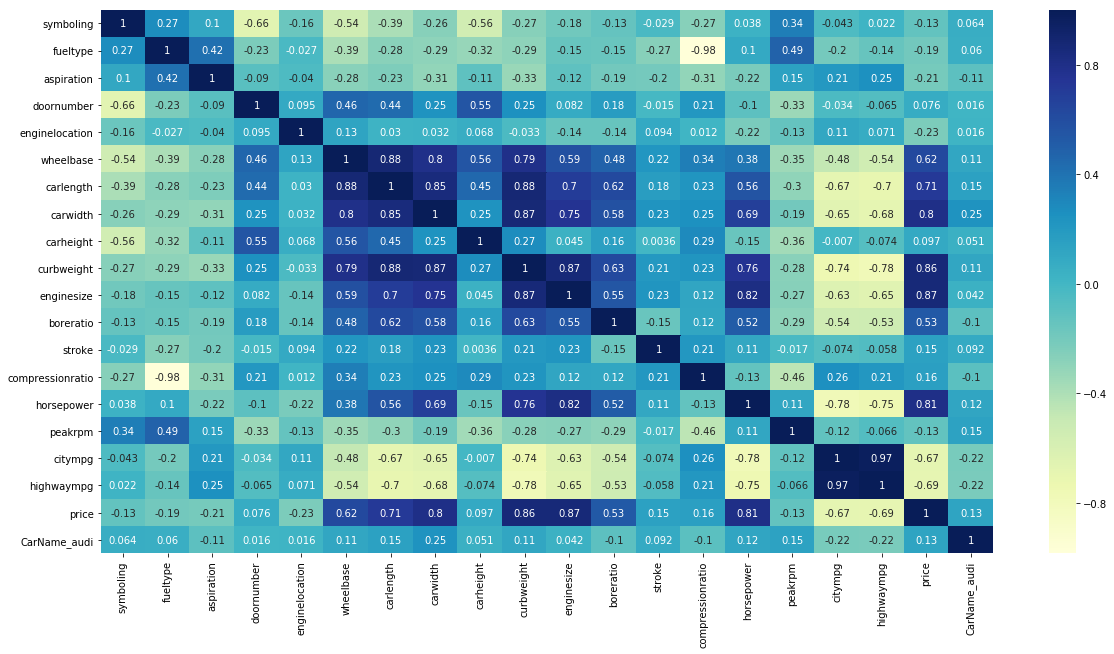

In [32]:
##### plotting heatmap for first 20 columns

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(carsprice_df_train.iloc[:,:20].corr(), annot=True, cmap='YlGnBu')
plt.show()


# Model building and evaluation 

### Training the model

In [33]:
###  Creating X_train and y_train

y_train = carsprice_df_train.pop('price')
X_train = carsprice_df_train


In [34]:
### checcking the shapes of X_train and y_train

print(X_train.shape)
print(y_train.shape)


(143, 64)
(143,)


### RFE (Recursive Feature Elimination)

In [35]:
### importing RFE and LinearRegresion from scikit learn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [36]:
### Running RFE with output number of variables equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)     ## Running RFE, passing model and number of features to select
rfe = rfe.fit(X_train, y_train)


In [37]:
### listing the RFE selected features

rfe_selected_features = X_train.columns[rfe.support_]
rfe_selected_features


Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_peugeot', 'CarName_porsche',
       'CarName_saab', 'CarName_subaru', 'CarName_volvo', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [38]:
### Listing the features that RFE did not select

X_train.columns[~rfe.support_]


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_toyota', 'CarName_volkswagen',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

In [39]:
### Listing the RFE selected features along with their ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('symboling', False, 35),
 ('fueltype', False, 15),
 ('aspiration', False, 4),
 ('doornumber', False, 34),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 16),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 27),
 ('highwaympg', False, 17),
 ('CarName_audi', False, 25),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 26),
 ('CarName_chevrolet', False, 13),
 ('CarName_dodge', False, 10),
 ('CarName_honda', False, 12),
 ('CarName_isuzu', False, 37),
 ('CarName_jaguar', False, 18),
 ('CarName_mazda', False, 31),
 ('CarName_mercury', False, 41),
 ('CarName_mitsubishi', False, 3),
 ('CarName_nissan', False, 30),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 9),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 39),
 ('CarName_saab

## Building the model using RFE selected features

In [40]:

X_train_model_1 = X_train[rfe_selected_features]

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_1)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.19e-71
Time:                        19:56:52   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0930      0.046     -2.006      0.047      -0.185      -0.001
enginelocation           -0.2087      0.039     -5.310      0.000      -0.287      -0.131
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
CarName_bmw               0.3087      0.027     11.488      0.000       0.256       0.362
CarName_peugeot          -0.1987      0.032     -6.217      0.000      -0.262      -0.135
CarName_porsche           0.2533      0.049      5.173      0.000       0.156       0.350
CarName_saab              0.1009      0.036      2.833      0.005       0.030       0.171
CarName_subaru           -0.0294      0.046     -0.635      0.526      -0.121       0.062
CarName_volvo             0.1111      0.030      3.741      0.000       0.052       0.170
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0864      0.035      2.453      0.016       0.017       0.156
enginetype_rotor          0.3014      0.036      8.293      0.000       0.229       0.373
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.3014      0.036      8.293      0.000       0.229       0.373
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     1.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Checking VIF


In [41]:

## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_1.values, i) for i in range(X_train_model_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
19,cylindernumber_two,inf
7,CarName_peugeot,inf
17,cylindernumber_three,inf
14,enginetype_rotor,inf
12,enginetype_l,inf
0,enginelocation,79.10
3,enginesize,37.13
10,CarName_subaru,32.00
13,enginetype_ohcf,25.13
16,cylindernumber_four,15.81


### Dropping CarName_subaru feature as it has high P-value and high VIF
### Rebuilding the model after removing CarName_subaru

In [42]:

X_train_model_2 = X_train_model_1.drop(columns=['CarName_subaru'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_2)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.19e-71
Time:                        19:56:52   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0637      0.091     -0.703      0.483      -0.243       0.116
enginelocation           -0.2381      0.081     -2.957      0.004      -0.397      -0.079
carwidth                  0.2790      0.062      4.514      0.000       0.157       0.401
curbweight                0.3011      0.075      4.040      0.000       0.154       0.449
enginesize                1.5805      0.176      9.003      0.000       1.233       1.928
boreratio                -0.4868      0.068     -7.149      0.000      -0.622      -0.352
stroke                   -0.2484      0.047     -5.269      0.000      -0.342      -0.155
CarName_bmw               0.3087      0.027     11.488      0.000       0.256       0.362
CarName_peugeot          -0.1987      0.032     -6.217      0.000      -0.262      -0.135
CarName_porsche           0.2533      0.049      5.173      0.000       0.156       0.350
CarName_saab              0.1009      0.036      2.833      0.005       0.030       0.171
CarName_volvo             0.1111      0.030      3.741      0.000       0.052       0.170
enginetype_l              0.1491      0.026      5.753      0.000       0.098       0.200
enginetype_ohcf           0.0570      0.031      1.868      0.064      -0.003       0.117
enginetype_rotor          0.3014      0.036      8.293      0.000       0.229       0.373
cylindernumber_five       0.2198      0.035      6.280      0.000       0.151       0.289
cylindernumber_four       0.2756      0.040      6.838      0.000       0.196       0.355
cylindernumber_three      0.3478      0.050      6.926      0.000       0.248       0.447
cylindernumber_twelve    -0.5489      0.097     -5.673      0.000      -0.740      -0.357
cylindernumber_two        0.3014      0.036      8.293      0.000       0.229       0.373
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.867
Skew:                           0.797   Prob(JB):                     1.48e-11
Kurtosis:                       5.414   Cond. No.                     9.60e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.53e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_2.values, i) for i in range(X_train_model_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
18,cylindernumber_two,inf
7,CarName_peugeot,inf
16,cylindernumber_three,inf
13,enginetype_rotor,inf
11,enginetype_l,inf
3,enginesize,98.50
0,enginelocation,62.51
2,curbweight,59.33
4,boreratio,52.55
15,cylindernumber_four,48.15


###  Dropping the column 'enginetype_ohcf' as it has high P-value and low VIF value
### Rebuilding the model after removing 'enginetype_ohcf' column

In [44]:
X_train_model_3 = X_train_model_2.drop(columns=['enginetype_ohcf'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_3)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.89e-71
Time:                        19:56:52   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0352      0.074      0.474      0.636      -0.112       0.182
enginelocation           -0.3058      0.073     -4.212      0.000      -0.449      -0.162
carwidth                  0.2950      0.062      4.772      0.000       0.173       0.417
curbweight                0.2985      0.075      3.966      0.000       0.150       0.447
enginesize                1.4561      0.164      8.876      0.000       1.131       1.781
boreratio                -0.4064      0.053     -7.625      0.000      -0.512      -0.301
stroke                   -0.2777      0.045     -6.188      0.000      -0.367      -0.189
CarName_bmw               0.2922      0.026     11.402      0.000       0.241       0.343
CarName_peugeot          -0.2009      0.032     -6.227      0.000      -0.265      -0.137
CarName_porsche           0.2118      0.044      4.806      0.000       0.125       0.299
CarName_saab              0.0765      0.033      2.286      0.024       0.010       0.143
CarName_volvo             0.0850      0.026      3.212      0.002       0.033       0.137
enginetype_l              0.1313      0.024      5.395      0.000       0.083       0.179
enginetype_rotor          0.2726      0.033      8.202      0.000       0.207       0.338
cylindernumber_five       0.1997      0.034      5.938      0.000       0.133       0.266
cylindernumber_four       0.2483      0.038      6.546      0.000       0.173       0.323
cylindernumber_three      0.3322      0.050      6.643      0.000       0.233       0.431
cylindernumber_twelve    -0.5132      0.096     -5.358      0.000      -0.703      -0.324
cylindernumber_two        0.2726      0.033      8.202      0.000       0.207       0.338
==============================================================================
Omnibus:                       22.837   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.491
Skew:                           0.682   Prob(JB):                     4.87e-11
Kurtosis:                       5.472   Cond. No.                     7.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
17,cylindernumber_two,inf
7,CarName_peugeot,inf
15,cylindernumber_three,inf
12,enginetype_rotor,inf
11,enginetype_l,inf
3,enginesize,96.64
0,enginelocation,59.70
2,curbweight,59.19
14,cylindernumber_four,47.33
1,carwidth,44.80


### Removing 'cylindernumber_two' column as it has high VIF
### Rebuilding the model after removing the 'cylindernumber_two' column

In [46]:
X_train_model_4 = X_train_model_3.drop(columns=['cylindernumber_two'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_4)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.89e-71
Time:                        19:56:52   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0352      0.074      0.474      0.636      -0.112       0.182
enginelocation           -0.3058      0.073     -4.212      0.000      -0.449      -0.162
carwidth                  0.2950      0.062      4.772      0.000       0.173       0.417
curbweight                0.2985      0.075      3.966      0.000       0.150       0.447
enginesize                1.4561      0.164      8.876      0.000       1.131       1.781
boreratio                -0.4064      0.053     -7.625      0.000      -0.512      -0.301
stroke                   -0.2777      0.045     -6.188      0.000      -0.367      -0.189
CarName_bmw               0.2922      0.026     11.402      0.000       0.241       0.343
CarName_peugeot          -0.2009      0.032     -6.227      0.000      -0.265      -0.137
CarName_porsche           0.2118      0.044      4.806      0.000       0.125       0.299
CarName_saab              0.0765      0.033      2.286      0.024       0.010       0.143
CarName_volvo             0.0850      0.026      3.212      0.002       0.033       0.137
enginetype_l              0.1313      0.024      5.395      0.000       0.083       0.179
enginetype_rotor          0.5451      0.066      8.202      0.000       0.414       0.677
cylindernumber_five       0.1997      0.034      5.938      0.000       0.133       0.266
cylindernumber_four       0.2483      0.038      6.546      0.000       0.173       0.323
cylindernumber_three      0.3322      0.050      6.643      0.000       0.233       0.431
cylindernumber_twelve    -0.5132      0.096     -5.358      0.000      -0.703      -0.324
==============================================================================
Omnibus:                       22.837   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.491
Skew:                           0.682   Prob(JB):                     4.87e-11
Kurtosis:                       5.472   Cond. No.                     5.65e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_4.values, i) for i in range(X_train_model_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
15,cylindernumber_three,inf
7,CarName_peugeot,inf
11,enginetype_l,inf
3,enginesize,96.64
0,enginelocation,59.70
2,curbweight,59.19
14,cylindernumber_four,47.33
1,carwidth,44.80
4,boreratio,39.77
5,stroke,31.02


### Removing 'cylindernumber_three' column as it has high VIF
### Rebuilding the model after removing the 'cylindernumber_three' column

In [48]:

X_train_model_5 = X_train_model_4.drop(columns=['cylindernumber_three'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_5)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.89e-71
Time:                        19:56:53   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0352      0.074      0.474      0.636      -0.112       0.182
enginelocation           -0.3058      0.073     -4.212      0.000      -0.449      -0.162
carwidth                  0.2950      0.062      4.772      0.000       0.173       0.417
curbweight                0.2985      0.075      3.966      0.000       0.150       0.447
enginesize                1.4561      0.164      8.876      0.000       1.131       1.781
boreratio                -0.4064      0.053     -7.625      0.000      -0.512      -0.301
stroke                   -0.2777      0.045     -6.188      0.000      -0.367      -0.189
CarName_bmw               0.2922      0.026     11.402      0.000       0.241       0.343
CarName_peugeot          -0.5331      0.081     -6.617      0.000      -0.693      -0.374
CarName_porsche           0.2118      0.044      4.806      0.000       0.125       0.299
CarName_saab              0.0765      0.033      2.286      0.024       0.010       0.143
CarName_volvo             0.0850      0.026      3.212      0.002       0.033       0.137
enginetype_l              0.4635      0.072      6.461      0.000       0.322       0.605
enginetype_rotor          0.5451      0.066      8.202      0.000       0.414       0.677
cylindernumber_five       0.1997      0.034      5.938      0.000       0.133       0.266
cylindernumber_four       0.2483      0.038      6.546      0.000       0.173       0.323
cylindernumber_twelve    -0.5132      0.096     -5.358      0.000      -0.703      -0.324
==============================================================================
Omnibus:                       22.837   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.491
Skew:                           0.682   Prob(JB):                     4.87e-11
Kurtosis:                       5.472   Cond. No.                         89.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_5.values, i) for i in range(X_train_model_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,enginesize,96.64
0,enginelocation,59.70
2,curbweight,59.19
14,cylindernumber_four,47.33
1,carwidth,44.80
4,boreratio,39.77
5,stroke,31.02
7,CarName_peugeot,17.70
11,enginetype_l,15.53
12,enginetype_rotor,5.46


### Removing 'enginesize' column as it has high VIF
### Rebuilding the model after removing the 'enginesize' column

In [50]:
X_train_model_6 = X_train_model_5.drop(columns=['enginesize'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_6)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.57
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.59e-59
Time:                        19:56:53   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     127   BIC:                            -300.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2632      0.088      2.977      0.003       0.088       0.438
enginelocation           -0.4239      0.091     -4.677      0.000      -0.603      -0.245
carwidth                  0.3733      0.078      4.804      0.000       0.220       0.527
curbweight                0.6350      0.083      7.693      0.000       0.472       0.798
boreratio                -0.0905      0.050     -1.796      0.075      -0.190       0.009
stroke                   -0.0250      0.044     -0.566      0.572      -0.112       0.062
CarName_bmw               0.2675      0.032      8.269      0.000       0.203       0.332
CarName_peugeot          -0.3340      0.098     -3.399      0.001      -0.528      -0.140
CarName_porsche           0.1620      0.056      2.918      0.004       0.052       0.272
CarName_saab              0.0188      0.042      0.451      0.653      -0.064       0.101
CarName_volvo             0.0035      0.032      0.111      0.912      -0.059       0.066
enginetype_l              0.1887      0.082      2.296      0.023       0.026       0.351
enginetype_rotor          0.0437      0.044      0.983      0.328      -0.044       0.132
cylindernumber_five      -0.0099      0.030     -0.325      0.746      -0.070       0.050
cylindernumber_four      -0.0080      0.031     -0.257      0.798      -0.070       0.054
cylindernumber_twelve     0.1559      0.075      2.078      0.040       0.007       0.304
==============================================================================
Omnibus:                       22.459   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.476
Skew:                           0.663   Prob(JB):                     4.91e-11
Kurtosis:                       5.492   Cond. No.                         46.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_6.values, i) for i in range(X_train_model_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,enginelocation,55.39
1,carwidth,44.55
2,curbweight,43.36
3,boreratio,22.62
13,cylindernumber_four,22.05
4,stroke,17.94
6,CarName_peugeot,16.62
10,enginetype_l,13.08
12,cylindernumber_five,1.77
11,enginetype_rotor,1.69


### Removing 'cylindernumber_four' column as it has high P-value and high VIF
### Rebuilding the model after removing the 'cylindernumber_four' column

In [52]:
X_train_model_7 = X_train_model_6.drop(columns=['cylindernumber_four'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_7)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.43
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.81e-60
Time:                        19:56:53   Log-Likelihood:                 189.81
No. Observations:                 143   AIC:                            -349.6
Df Residuals:                     128   BIC:                            -305.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2608      0.088      2.977      0.003       0.087       0.434
enginelocation           -0.4296      0.087     -4.911      0.000      -0.603      -0.257
carwidth                  0.3768      0.076      4.945      0.000       0.226       0.528
curbweight                0.6484      0.064     10.160      0.000       0.522       0.775
boreratio                -0.0975      0.042     -2.312      0.022      -0.181      -0.014
stroke                   -0.0280      0.042     -0.662      0.509      -0.112       0.056
CarName_bmw               0.2706      0.030      9.049      0.000       0.211       0.330
CarName_peugeot          -0.3493      0.078     -4.485      0.000      -0.503      -0.195
CarName_porsche           0.1635      0.055      2.971      0.004       0.055       0.272
CarName_saab              0.0167      0.041      0.410      0.682      -0.064       0.097
CarName_volvo             0.0025      0.031      0.081      0.936      -0.059       0.064
enginetype_l              0.1995      0.070      2.832      0.005       0.060       0.339
enginetype_rotor          0.0508      0.035      1.460      0.147      -0.018       0.120
cylindernumber_five      -0.0073      0.029     -0.254      0.800      -0.064       0.049
cylindernumber_twelve     0.1540      0.074      2.071      0.040       0.007       0.301
==============================================================================
Omnibus:                       22.349   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.946
Skew:                           0.654   Prob(JB):                     3.88e-11
Kurtosis:                       5.517   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_7.values, i) for i in range(X_train_model_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,carwidth,42.77
2,curbweight,26.39
0,enginelocation,25.62
4,stroke,16.35
3,boreratio,15.63
6,CarName_peugeot,10.55
10,enginetype_l,9.70
12,cylindernumber_five,1.58
7,CarName_porsche,1.44
9,CarName_volvo,1.26


### Removing 'stroke' column as it has high P-value and high VIF
### Rebuilding the model after removing the 'stroke' column

In [54]:
X_train_model_8 = X_train_model_7.drop(columns=['stroke'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_8)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.81e-61
Time:                        19:56:53   Log-Likelihood:                 189.56
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     129   BIC:                            -309.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2472      0.085      2.909      0.004       0.079       0.415
enginelocation           -0.4296      0.087     -4.921      0.000      -0.602      -0.257
carwidth                  0.3686      0.075      4.913      0.000       0.220       0.517
curbweight                0.6408      0.063     10.230      0.000       0.517       0.765
boreratio                -0.0880      0.040     -2.224      0.028      -0.166      -0.010
CarName_bmw               0.2729      0.030      9.204      0.000       0.214       0.332
CarName_peugeot          -0.3467      0.078     -4.467      0.000      -0.500      -0.193
CarName_porsche           0.1659      0.055      3.029      0.003       0.058       0.274
CarName_saab              0.0192      0.040      0.475      0.636      -0.061       0.099
CarName_volvo             0.0055      0.031      0.179      0.858      -0.055       0.066
enginetype_l              0.1993      0.070      2.837      0.005       0.060       0.338
enginetype_rotor          0.0507      0.035      1.461      0.147      -0.018       0.119
cylindernumber_five      -0.0059      0.028     -0.208      0.835      -0.062       0.050
cylindernumber_twelve     0.1672      0.071      2.338      0.021       0.026       0.309
==============================================================================
Omnibus:                       22.450   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.423
Skew:                           0.672   Prob(JB):                     8.31e-11
Kurtosis:                       5.447   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_8.values, i) for i in range(X_train_model_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,carwidth,42.15
2,curbweight,25.22
3,boreratio,14.07
0,enginelocation,13.56
5,CarName_peugeot,10.52
9,enginetype_l,9.70
11,cylindernumber_five,1.58
6,CarName_porsche,1.44
8,CarName_volvo,1.24
4,CarName_bmw,1.15


### Removing 'CarName_volvo' column as it has high P-value and low VIF
### Rebuilding the model after removing the 'CarName_volvo' column

In [56]:
X_train_model_9 = X_train_model_8.drop(columns=['CarName_volvo'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_9)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.49e-62
Time:                        19:56:54   Log-Likelihood:                 189.54
No. Observations:                 143   AIC:                            -353.1
Df Residuals:                     130   BIC:                            -314.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2473      0.085      2.921      0.004       0.080       0.415
enginelocation           -0.4307      0.087     -4.965      0.000      -0.602      -0.259
carwidth                  0.3708      0.074      5.029      0.000       0.225       0.517
curbweight                0.6406      0.062     10.267      0.000       0.517       0.764
boreratio                -0.0868      0.039     -2.233      0.027      -0.164      -0.010
CarName_bmw               0.2722      0.029      9.294      0.000       0.214       0.330
CarName_peugeot          -0.3487      0.077     -4.554      0.000      -0.500      -0.197
CarName_porsche           0.1641      0.054      3.059      0.003       0.058       0.270
CarName_saab              0.0185      0.040      0.460      0.646      -0.061       0.098
enginetype_l              0.2002      0.070      2.865      0.005       0.062       0.338
enginetype_rotor          0.0502      0.034      1.457      0.148      -0.018       0.118
cylindernumber_five      -0.0069      0.028     -0.250      0.803      -0.062       0.048
cylindernumber_twelve     0.1658      0.071      2.342      0.021       0.026       0.306
==============================================================================
Omnibus:                       21.915   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.782
Skew:                           0.660   Prob(JB):                     1.89e-10
Kurtosis:                       5.403   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_9.values, i) for i in range(X_train_model_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,carwidth,41.00
2,curbweight,25.22
3,boreratio,13.71
0,enginelocation,12.51
5,CarName_peugeot,10.32
8,enginetype_l,9.66
10,cylindernumber_five,1.52
6,CarName_porsche,1.37
4,CarName_bmw,1.13
11,cylindernumber_twelve,1.10


### Removing 'cylindernumber_five' column as it has high P-value and low VIF
### Rebuilding the model after removing the 'cylindernumber_five' column

In [58]:
X_train_model_10 = X_train_model_9.drop(columns=['cylindernumber_five'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_10)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.02e-63
Time:                        19:56:54   Log-Likelihood:                 189.51
No. Observations:                 143   AIC:                            -355.0
Df Residuals:                     131   BIC:                            -319.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2459      0.084      2.922      0.004       0.079       0.412
enginelocation           -0.4280      0.086     -4.991      0.000      -0.598      -0.258
carwidth                  0.3637      0.068      5.373      0.000       0.230       0.498
curbweight                0.6416      0.062     10.340      0.000       0.519       0.764
boreratio                -0.0847      0.038     -2.239      0.027      -0.160      -0.010
CarName_bmw               0.2729      0.029      9.397      0.000       0.215       0.330
CarName_peugeot          -0.3456      0.075     -4.589      0.000      -0.495      -0.197
CarName_porsche           0.1661      0.053      3.143      0.002       0.062       0.271
CarName_saab              0.0190      0.040      0.476      0.635      -0.060       0.098
enginetype_l              0.1985      0.069      2.865      0.005       0.061       0.336
enginetype_rotor          0.0508      0.034      1.480      0.141      -0.017       0.119
cylindernumber_twelve     0.1683      0.070      2.410      0.017       0.030       0.306
==============================================================================
Omnibus:                       22.616   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.994
Skew:                           0.675   Prob(JB):                     6.24e-11
Kurtosis:                       5.463   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_10.values, i) for i in range(X_train_model_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,carwidth,34.95
2,curbweight,25.15
3,boreratio,13.10
0,enginelocation,11.69
5,CarName_peugeot,10.06
8,enginetype_l,9.57
6,CarName_porsche,1.35
4,CarName_bmw,1.12
10,cylindernumber_twelve,1.08
7,CarName_saab,1.06


### Removing 'CarName_saab' column as it has high P-value and low VIF
### Rebuilding the model after removing the 'CarName_saab' column

In [60]:
X_train_model_11 = X_train_model_10.drop(columns=['CarName_saab'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_11)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.72e-64
Time:                        19:56:54   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2454      0.084      2.925      0.004       0.079       0.411
enginelocation           -0.4282      0.085     -5.008      0.000      -0.597      -0.259
carwidth                  0.3631      0.067      5.382      0.000       0.230       0.497
curbweight                0.6418      0.062     10.374      0.000       0.519       0.764
boreratio                -0.0820      0.037     -2.199      0.030      -0.156      -0.008
CarName_bmw               0.2720      0.029      9.413      0.000       0.215       0.329
CarName_peugeot          -0.3469      0.075     -4.622      0.000      -0.495      -0.198
CarName_porsche           0.1644      0.053      3.126      0.002       0.060       0.268
enginetype_l              0.1987      0.069      2.875      0.005       0.062       0.335
enginetype_rotor          0.0502      0.034      1.468      0.145      -0.017       0.118
cylindernumber_twelve     0.1673      0.070      2.405      0.018       0.030       0.305
==============================================================================
Omnibus:                       22.096   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.356
Skew:                           0.664   Prob(JB):                     1.42e-10
Kurtosis:                       5.419   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_11.values, i) for i in range(X_train_model_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,carwidth,34.94
2,curbweight,25.14
3,boreratio,12.80
0,enginelocation,11.64
5,CarName_peugeot,10.04
7,enginetype_l,9.57
6,CarName_porsche,1.34
4,CarName_bmw,1.12
9,cylindernumber_twelve,1.08
8,enginetype_rotor,1.04


### Removing 'enginetype_rotor' column as it has high P-value and low VIF
### Rebuilding the model after removing the 'enginetype_rotor' column

In [62]:
X_train_model_12 = X_train_model_11.drop(columns=['enginetype_rotor'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_12)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.09e-64
Time:                        19:56:54   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2476      0.084      2.939      0.004       0.081       0.414
enginelocation           -0.4301      0.086     -5.010      0.000      -0.600      -0.260
carwidth                  0.3680      0.068      5.437      0.000       0.234       0.502
curbweight                0.6354      0.062     10.252      0.000       0.513       0.758
boreratio                -0.0785      0.037     -2.099      0.038      -0.152      -0.005
CarName_bmw               0.2707      0.029      9.332      0.000       0.213       0.328
CarName_peugeot          -0.3478      0.075     -4.614      0.000      -0.497      -0.199
CarName_porsche           0.1605      0.053      3.043      0.003       0.056       0.265
enginetype_l              0.1978      0.069      2.851      0.005       0.061       0.335
cylindernumber_twelve     0.1666      0.070      2.384      0.019       0.028       0.305
==============================================================================
Omnibus:                       20.602   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.955
Skew:                           0.639   Prob(JB):                     2.11e-09
Kurtosis:                       5.253   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_12.values, i) for i in range(X_train_model_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,carwidth,34.87
2,curbweight,25.03
3,boreratio,12.75
0,enginelocation,11.64
5,CarName_peugeot,10.04
7,enginetype_l,9.57
6,CarName_porsche,1.33
4,CarName_bmw,1.12
8,cylindernumber_twelve,1.08


### Removing 'carwidth' column as it has high VIF
### Rebuilding the model after removing the 'carwidth' column

In [64]:
X_train_model_13 = X_train_model_12.drop(columns=['carwidth'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_13)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.28e-60
Time:                        19:56:55   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1760      0.092      1.920      0.057      -0.005       0.357
enginelocation           -0.3018      0.091     -3.319      0.001      -0.482      -0.122
curbweight                0.9073      0.040     22.497      0.000       0.828       0.987
boreratio                -0.0733      0.041     -1.781      0.077      -0.155       0.008
CarName_bmw               0.2505      0.032      7.903      0.000       0.188       0.313
CarName_peugeot          -0.2865      0.082     -3.490      0.001      -0.449      -0.124
CarName_porsche           0.2381      0.056      4.259      0.000       0.128       0.349
enginetype_l              0.1401      0.076      1.855      0.066      -0.009       0.289
cylindernumber_twelve     0.1625      0.077      2.111      0.037       0.010       0.315
==============================================================================
Omnibus:                       18.903   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.663
Skew:                          -0.152   Prob(JB):                     1.85e-18
Kurtosis:                       6.690   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_13.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_13.values, i) for i in range(X_train_model_13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
2,boreratio,12.75
4,CarName_peugeot,9.81
6,enginetype_l,9.34
1,curbweight,8.91
0,enginelocation,8.07
5,CarName_porsche,1.27
3,CarName_bmw,1.10
7,cylindernumber_twelve,1.08


### Removing 'boreratio' column as it has high P-value and high VIF
### Rebuilding the model after removing the 'boreratio' column

In [66]:
X_train_model_14 = X_train_model_13.drop(columns=['boreratio'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_14)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.97e-60
Time:                        19:56:55   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1636      0.092      1.775      0.078      -0.019       0.346
enginelocation           -0.3085      0.092     -3.369      0.001      -0.490      -0.127
curbweight                0.8671      0.034     25.755      0.000       0.800       0.934
CarName_bmw               0.2482      0.032      7.776      0.000       0.185       0.311
CarName_peugeot          -0.2994      0.082     -3.632      0.000      -0.462      -0.136
CarName_porsche           0.2087      0.054      3.876      0.000       0.102       0.315
enginetype_l              0.1458      0.076      1.917      0.057      -0.005       0.296
cylindernumber_twelve     0.1700      0.077      2.195      0.030       0.017       0.323
==============================================================================
Omnibus:                       14.160   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.339
Skew:                          -0.024   Prob(JB):                     8.66e-11
Kurtosis:                       5.788   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_14.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_14.values, i) for i in range(X_train_model_14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
3,CarName_peugeot,9.74
5,enginetype_l,9.33
1,curbweight,6.07
0,enginelocation,5.18
2,CarName_bmw,1.10
6,cylindernumber_twelve,1.08
4,CarName_porsche,1.07


### Removing 'enginetype_l' column as it has high P-value and high VIF
### Rebuilding the model after removing the 'enginetype_l' column

In [68]:
X_train_model_15 = X_train_model_14.drop(columns=['enginetype_l'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_15)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.77e-61
Time:                        19:56:55   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1674      0.093      1.800      0.074      -0.016       0.351
enginelocation           -0.3072      0.092     -3.322      0.001      -0.490      -0.124
curbweight                0.8563      0.034     25.547      0.000       0.790       0.923
CarName_bmw               0.2492      0.032      7.732      0.000       0.185       0.313
CarName_peugeot          -0.1515      0.029     -5.168      0.000      -0.209      -0.094
CarName_porsche           0.2101      0.054      3.865      0.000       0.103       0.318
cylindernumber_twelve     0.1751      0.078      2.240      0.027       0.021       0.330
==============================================================================
Omnibus:                       13.430   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               41.172
Skew:                           0.059   Prob(JB):                     1.15e-09
Kurtosis:                       5.626   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_15.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_15.values, i) for i in range(X_train_model_15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,curbweight,5.90
0,enginelocation,5.00
3,CarName_peugeot,1.21
2,CarName_bmw,1.10
4,CarName_porsche,1.07
5,cylindernumber_twelve,1.07


### Though curbweigth has high VIF than enginelocation, removing curbweight drops the r-sqaure to 32. so keeping it in the model.
### Removing 'enginelocation' column as it has high VIF
### Rebuilding the model after removing the 'enginelocation' column

In [70]:
X_train_model_16 = X_train_model_15.drop(columns=['enginelocation'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_16)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.19e-59
Time:                        19:56:55   Log-Likelihood:                 164.71
No. Observations:                 143   AIC:                            -317.4
Df Residuals:                     137   BIC:                            -299.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1379      0.015     -9.348      0.000      -0.167      -0.109
curbweight                0.8513      0.035     24.542      0.000       0.783       0.920
CarName_bmw               0.2501      0.033      7.493      0.000       0.184       0.316
CarName_peugeot          -0.1500      0.030     -4.940      0.000      -0.210      -0.090
CarName_porsche           0.3134      0.046      6.789      0.000       0.222       0.405
cylindernumber_twelve     0.1780      0.081      2.198      0.030       0.018       0.338
==============================================================================
Omnibus:                       12.168   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               30.933
Skew:                           0.170   Prob(JB):                     1.92e-07
Kurtosis:                       5.253   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_16.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_16.values, i) for i in range(X_train_model_16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,curbweight,1.33
2,CarName_peugeot,1.16
1,CarName_bmw,1.09
3,CarName_porsche,1.04
4,cylindernumber_twelve,1.04


### Dropping 'CarName_peugeot' as it has negative coefficient and also it will not be helpful in predicting the car price

In [72]:

X_train_model_17 = X_train_model_16.drop(columns=['CarName_peugeot'])

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_17)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.76e-56
Time:                        19:56:56   Log-Likelihood:                 152.99
No. Observations:                 143   AIC:                            -296.0
Df Residuals:                     138   BIC:                            -281.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1237      0.016     -7.906      0.000      -0.155      -0.093
curbweight                0.7922      0.035     22.499      0.000       0.723       0.862
CarName_bmw               0.2699      0.036      7.530      0.000       0.199       0.341
CarName_porsche           0.3332      0.050      6.698      0.000       0.235       0.432
cylindernumber_twelve     0.2203      0.087      2.529      0.013       0.048       0.392
==============================================================================
Omnibus:                       10.999   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               21.046
Skew:                           0.287   Prob(JB):                     2.69e-05
Kurtosis:                       4.790   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_17.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_17.values, i) for i in range(X_train_model_17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,curbweight,1.15
1,CarName_bmw,1.08
2,CarName_porsche,1.04
3,cylindernumber_twelve,1.03


### Adding 'enginetype_l' to improve R-sqaure and also 'enginetype_l' is there in top 20 features selected by RFE

In [74]:
X_train_model_18 = pd.concat([X_train_model_17, X_train[['enginetype_l']]], axis=1)

## statsmodel by default does not add the intercept(constant), we should do it manually 
X_train_sm = sm.add_constant(X_train_model_18)

# create the model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# model summary parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     176.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           7.29e-58
Time:                        19:56:56   Log-Likelihood:                 160.40
No. Observations:                 143   AIC:                            -308.8
Df Residuals:                     137   BIC:                            -291.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1304      0.015     -8.689      0.000      -0.160      -0.101
curbweight                0.8286      0.035     23.777      0.000       0.760       0.898
CarName_bmw               0.2557      0.034      7.445      0.000       0.188       0.324
CarName_porsche           0.3190      0.048      6.710      0.000       0.225       0.413
cylindernumber_twelve     0.1922      0.083      2.307      0.023       0.027       0.357
enginetype_l             -0.1117      0.029     -3.868      0.000      -0.169      -0.055
==============================================================================
Omnibus:                       16.395   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.833
Skew:                           0.434   Prob(JB):                     1.00e-08
Kurtosis:                       5.330   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_model_18.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_18.values, i) for i in range(X_train_model_18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,curbweight,1.31
4,enginetype_l,1.14
1,CarName_bmw,1.09
2,CarName_porsche,1.04
3,cylindernumber_twelve,1.04


## Residual Analysis 

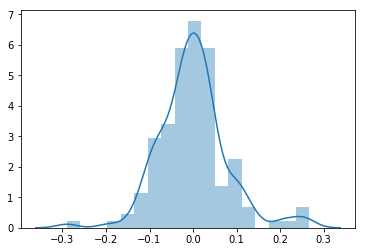

In [76]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred
sns.distplot(res)

## Predictions and evaluation on the test dataset

In [77]:
# create a list of numeric variables
numeric_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# 2. fit on data
carsprice_df_test[numeric_vars] = scaler.transform(carsprice_df_test[numeric_vars])
carsprice_df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,...,0,0,0,1,0,0,0,0,0,0
186,0.8,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,...,0,0,0,0,0,0,0,1,0,0
59,0.6,1,1,0,1,0.420690,0.596748,0.516667,0.522124,0.347944,...,0,0,0,1,0,0,0,0,0,0
165,0.6,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.301396,...,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,0,1,0.231034,0.263415,0.291667,0.699115,0.291699,...,0,0,0,1,0,0,0,0,0,0


In [78]:
carsprice_df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.822581,0.564516,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# creating X_test and y_test

y_test = carsprice_df_test.pop('price')
X_test = carsprice_df_test


In [80]:

### drop the columns from X_test and keep only the columns that are present in X_train_model_16
X_test_new = X_test[X_train_model_18.columns]

## adding a constant
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()


,const,curbweight,CarName_bmw,CarName_porsche,cylindernumber_twelve,enginetype_l
160,1.0,0.235066,0,0,0,0
186,1.0,0.305275,0,0,0,0
59,1.0,0.347944,0,0,0,0
165,1.0,0.301396,0,0,0,0
140,1.0,0.291699,0,0,0,0


In [81]:

# predict
y_test_pred = lr_model.predict(X_test_sm)


Text(0, 0.5, 'y_test_pred')

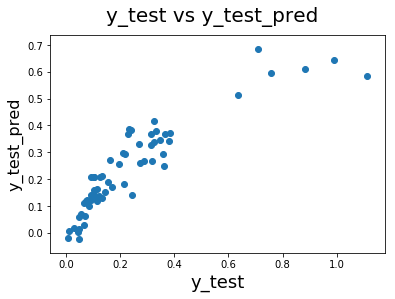

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_test_pred')

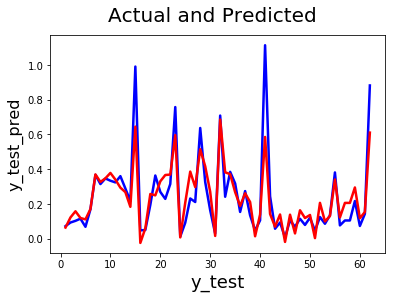

In [83]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [84]:

# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)


0.7792488826701843

### My final model has these 5 independent variables
- curbweight with coefficient 0.8286
    - With unit increase in curbweight, price increases by 0.8286
- CarName_bmw with coefficient 0.2557 
- CarName_porsche with coefficient 0.3190
    - CarBrands BMW and PORSCHE influence the price of car
- cylindernumber_twelve with coefficient 0.1922
    - Higher cylinder numbers influence the price of car
- enginetype_l with coefficient -0.1117
    - Enginetype_l has negative coefficient indicating that cars with these types of engines will have lesser price